<a href="https://colab.research.google.com/github/superguine/ODProject/blob/main/ODP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

documentation. Creation Date 26/08/2024

# Installation
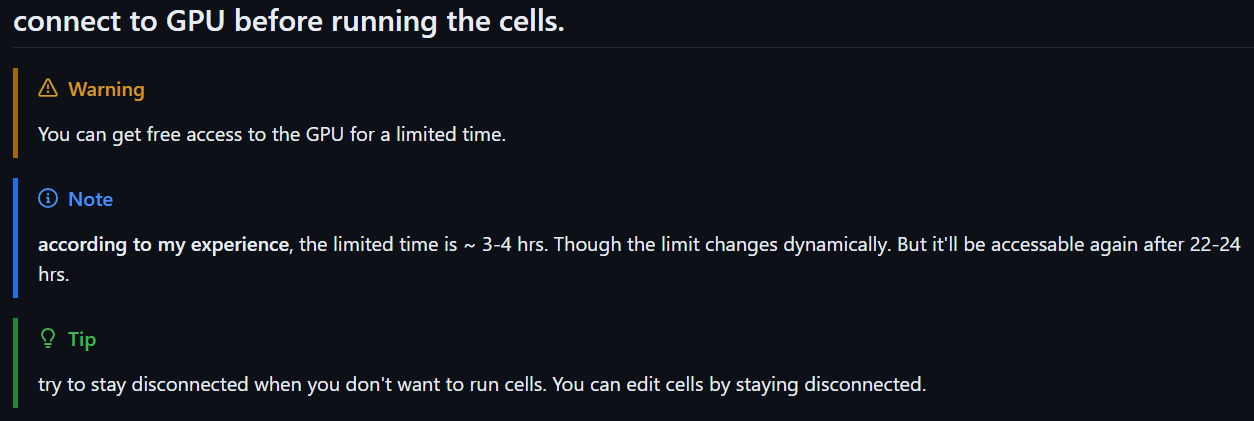

In [ ]:
# Checks for GPU and lists them.
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
# Clone the tensorflow models repository from GitHub
!pip uninstall Cython -y # Temporary fix for "No module named 'object_detection'" error
!git clone --depth 1 https://github.com/tensorflow/models

In [9]:
# Copy setup files into models/research folder
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
#cp object_detection/packages/tf2/setup.py .

In [10]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.17.0
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [ ]:
# Need to do a temporary fix with PyYAML because Colab isn't able to install PyYAML v5.4.1
!pip install pyyaml==5.3
!pip install /content/models/research/


In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py